This notebook implements autoencoder with sparse encoding. With 100 activation units in the hidden layer. With a for loop for calculating kl-divergence loss. Unexpectedly training with the for loop was better that the vectorized implementation of kl-divergence loss.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.0005
num_in = 784
num_h = 784
num_out = 784
num_epochs = 70
img_size = [28,28]
batch_size = 100

In [5]:
x = tf.placeholder(tf.float32, [None,num_in])

In [6]:
rho = tf.fill([1,num_h], 0.01)

In [7]:
weights = {
    'in':tf.Variable(tf.random_normal([num_in, num_h])),
    'h':tf.Variable(tf.random_normal([num_h, num_out]))
}

biases = {
    'in':tf.Variable(tf.random_normal([1,num_h])),
    'h':tf.Variable(tf.random_normal([1,num_out]))
}

In [8]:
h_layer = tf.add(tf.matmul(x, weights['in']), biases['in'])
h_layer = tf.nn.sigmoid(h_layer)
out_layer = tf.add(tf.matmul(h_layer, weights['h']), biases['h'])

In [9]:
rho_cap = tf.Variable(tf.zeros([1, num_h]))
rho_cap = rho_cap + h_layer/mnist.train.num_examples

In [10]:
loss_op = tf.losses.mean_squared_error(out_layer, x)

In [11]:
#optimizer = tf.train.AdamOptimizer(learning_rate)

In [12]:
#train_op = optimizer.minimize(loss_op)

In [13]:
ones = tf.Variable(tf.ones([1,num_h]))

In [14]:
#kl_loss = tf.multiply(rho, tf.log(tf.div(rho, rho_cap))) + tf.multiply((ones-rho), tf.log(tf.div(ones-rho, ones-rho_cap)))

In [15]:
#loss_op1 = tf.reduce_mean(kl_loss)

In [16]:
loss_op1 = 0
for i in range(5):
    loss_op1 += rho[0,0]*tf.log(rho[0,0]/rho_cap[0,i]) + (1-rho[0,0])*tf.log((1-rho[0,0])/(1-rho_cap[0,i]))

In [17]:
loss_op2 = loss_op1 + loss_op

In [18]:
optimizer1= tf.train.AdamOptimizer(1e-4)

In [19]:
train_op1 = optimizer1.minimize(loss_op2)

In [20]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples/batch_size
        c1=0
        c=0
        for _ in range(int(num_batches)):
            batch_x, _ = mnist.train.next_batch(batch_size)
            _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:batch_x})
            c1 += cost1/num_batches
            c += cost/num_batches
        print('after '+str(epoch+1)+' epochs '+'error cost is '+str(c)+','+'sparse encoding cost is '+str(c1))
    save_path = saver.save(sess, 'saved_model/sparse_encoder5.1.ckpt')

after 1 epochs error cost is 179.11665412209246,sparse encoding cost is 0.05592351961542262
after 2 epochs error cost is 76.44618911049577,sparse encoding cost is 0.03216767821460964
after 3 epochs error cost is 48.79001570268114,sparse encoding cost is 0.024680716554549596
after 4 epochs error cost is 31.85681000449443,sparse encoding cost is 0.020511298545382254
after 5 epochs error cost is 20.088061138499864,sparse encoding cost is 0.017640309614891353
after 6 epochs error cost is 12.143139210614287,sparse encoding cost is 0.015408692378550764
after 7 epochs error cost is 7.263374183828175,sparse encoding cost is 0.013551824228330097
after 8 epochs error cost is 4.441317849592733,sparse encoding cost is 0.011950573604553946
after 9 epochs error cost is 2.845632266998287,sparse encoding cost is 0.01053550033745441
after 10 epochs error cost is 1.8788183696703473,sparse encoding cost is 0.009264749415557489
after 11 epochs error cost is 1.291078028678893,sparse encoding cost is 0.0081

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


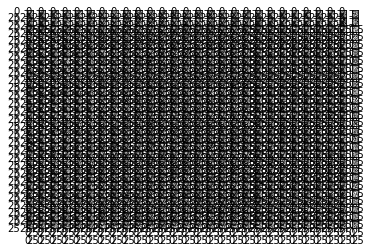

In [30]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    plt.figure(figsize=(30,30))
    fig, axes = plt.subplots(28,28)
    for i,ax in enumerate(axes.flat):
        template = tf.transpose(weights['in'][:,i])
        template = template.eval()
        template = template/np.max(template)
        template = template.reshape((28,28))
        ax.imshow(template, cmap = 'binary')
        #plt.show()

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


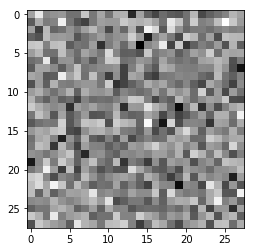

In [24]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,0])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


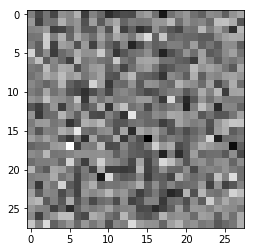

In [25]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,1])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


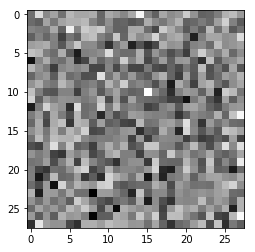

In [26]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,2])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


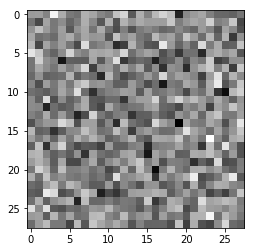

In [27]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,3])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


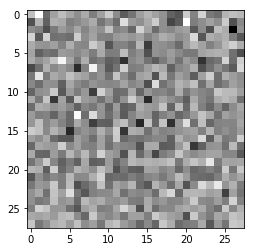

In [28]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,4])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from saved_model/sparse_encoder5.1.ckpt


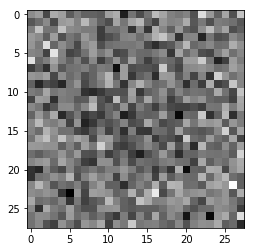

In [29]:
with tf.Session() as sess:
    saver.restore(sess, 'saved_model/sparse_encoder5.1.ckpt')
    template = tf.transpose(weights['in'][:,5])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')